In [1]:
import numpy as np
from tqdm.auto import tqdm
import imageio
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def julia_mask(min_value=-2, max_value=2, density=100, 
                 c= 0.28 + 0.0113j, max_iter=100):
    """
    Returns binary map
    min_value, max_value: define a square on a complex plane
    density: number of points between min and max value
    max_iter: how long to iterate in each point
    limit: defines divergence
    """
    x = np.linspace(max_value, min_value, density)
    y = np.linspace(min_value, max_value, density)
    limit = (1 + np.sqrt(1 + 4 * np.abs(c))) / 2
    grid = np.stack(np.meshgrid(x, y, indexing='ij'), axis=-1)
    Z = (grid[..., 1] + 1j * grid[..., 0]) # array of complex values

    M = np.full((density, density), True, dtype=bool)
    I = np.zeros_like(M).astype(np.int32)
    for i in range(max_iter):
        Z[M] = Z[M] * Z[M] + c
        I[M] += 1
        M[np.abs(Z) > limit] = False
        
    return -I

In [3]:
def plot_julia(img, c):
    plt.figure(figsize=(14,11))
    plt.imshow(img, cmap='gnuplot2', extent=(-2, 2, -2, 2))
    plt.tick_params(axis='both', labelsize=20)
    plt.title(f"Julia set, C = {c}", fontsize=20)
    plt.xlabel('Re(Z)', fontsize=20)
    plt.ylabel('Im(Z)', fontsize=20)

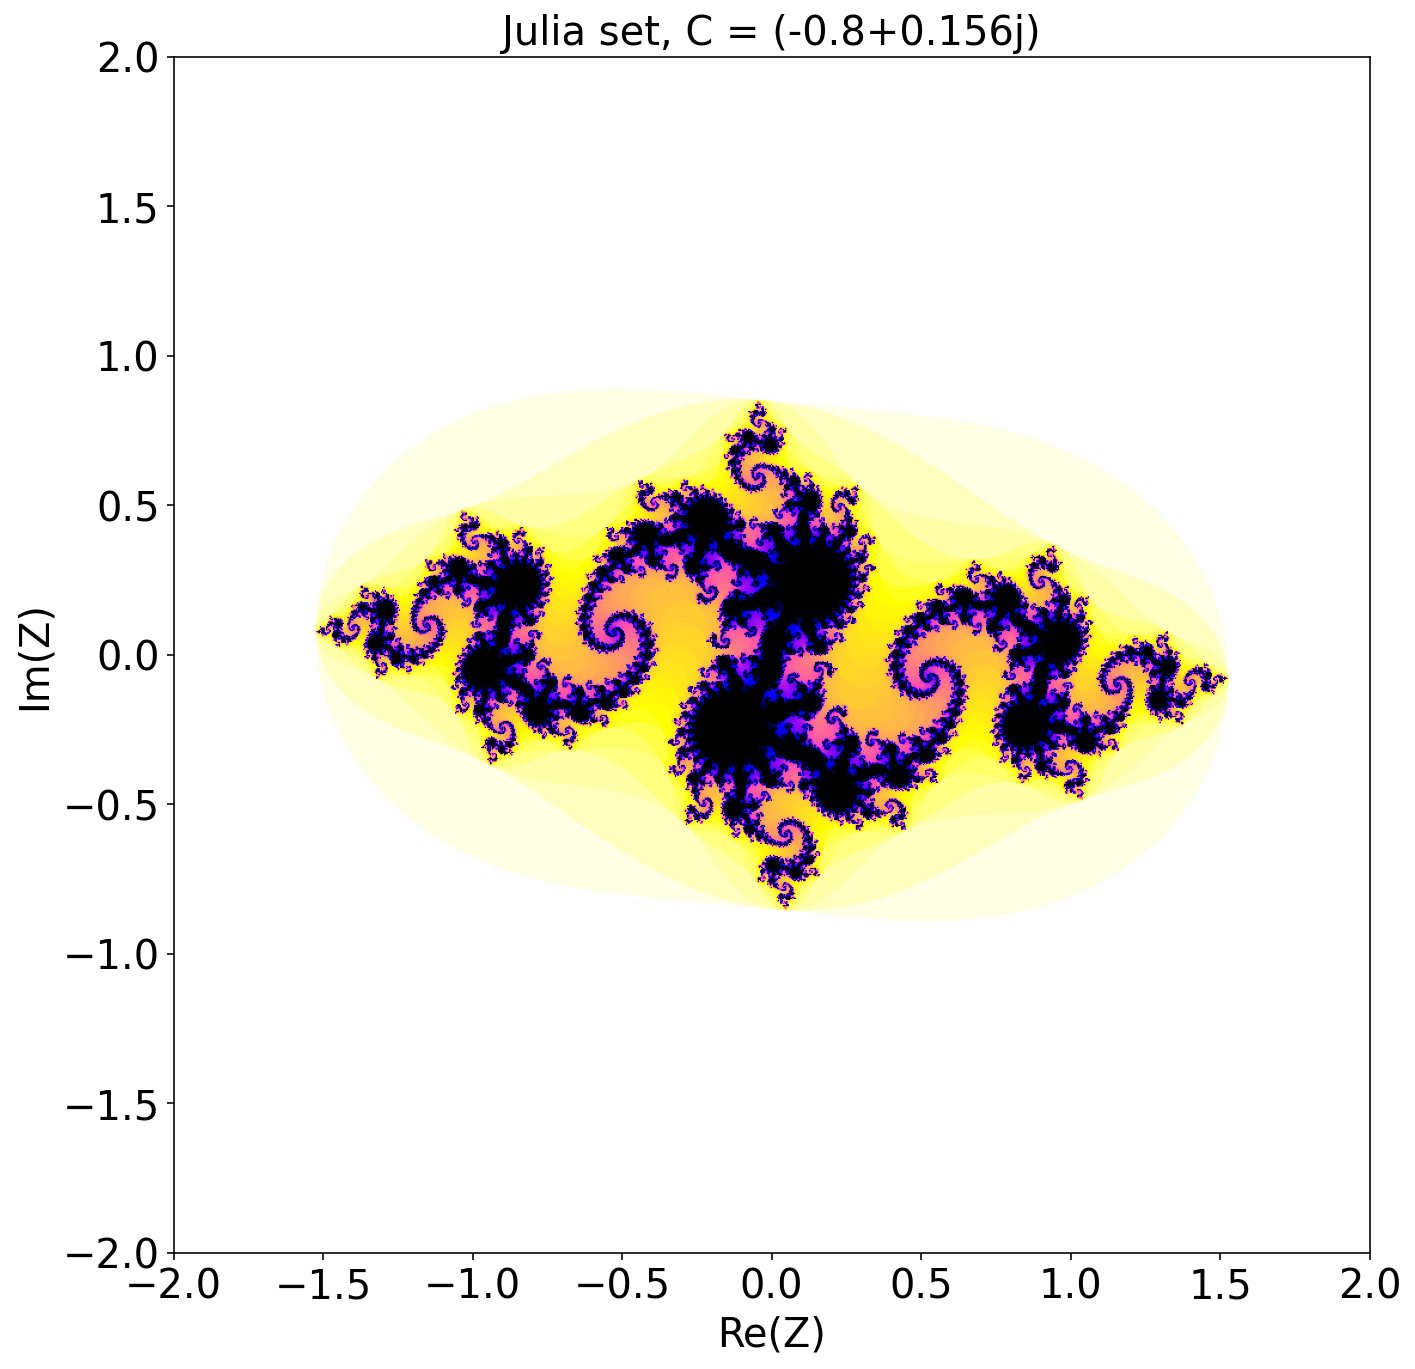

In [4]:
plot_julia(julia_mask(density=1000, c=-.8+0.156j), c=-.8+0.156j)
plt.show()

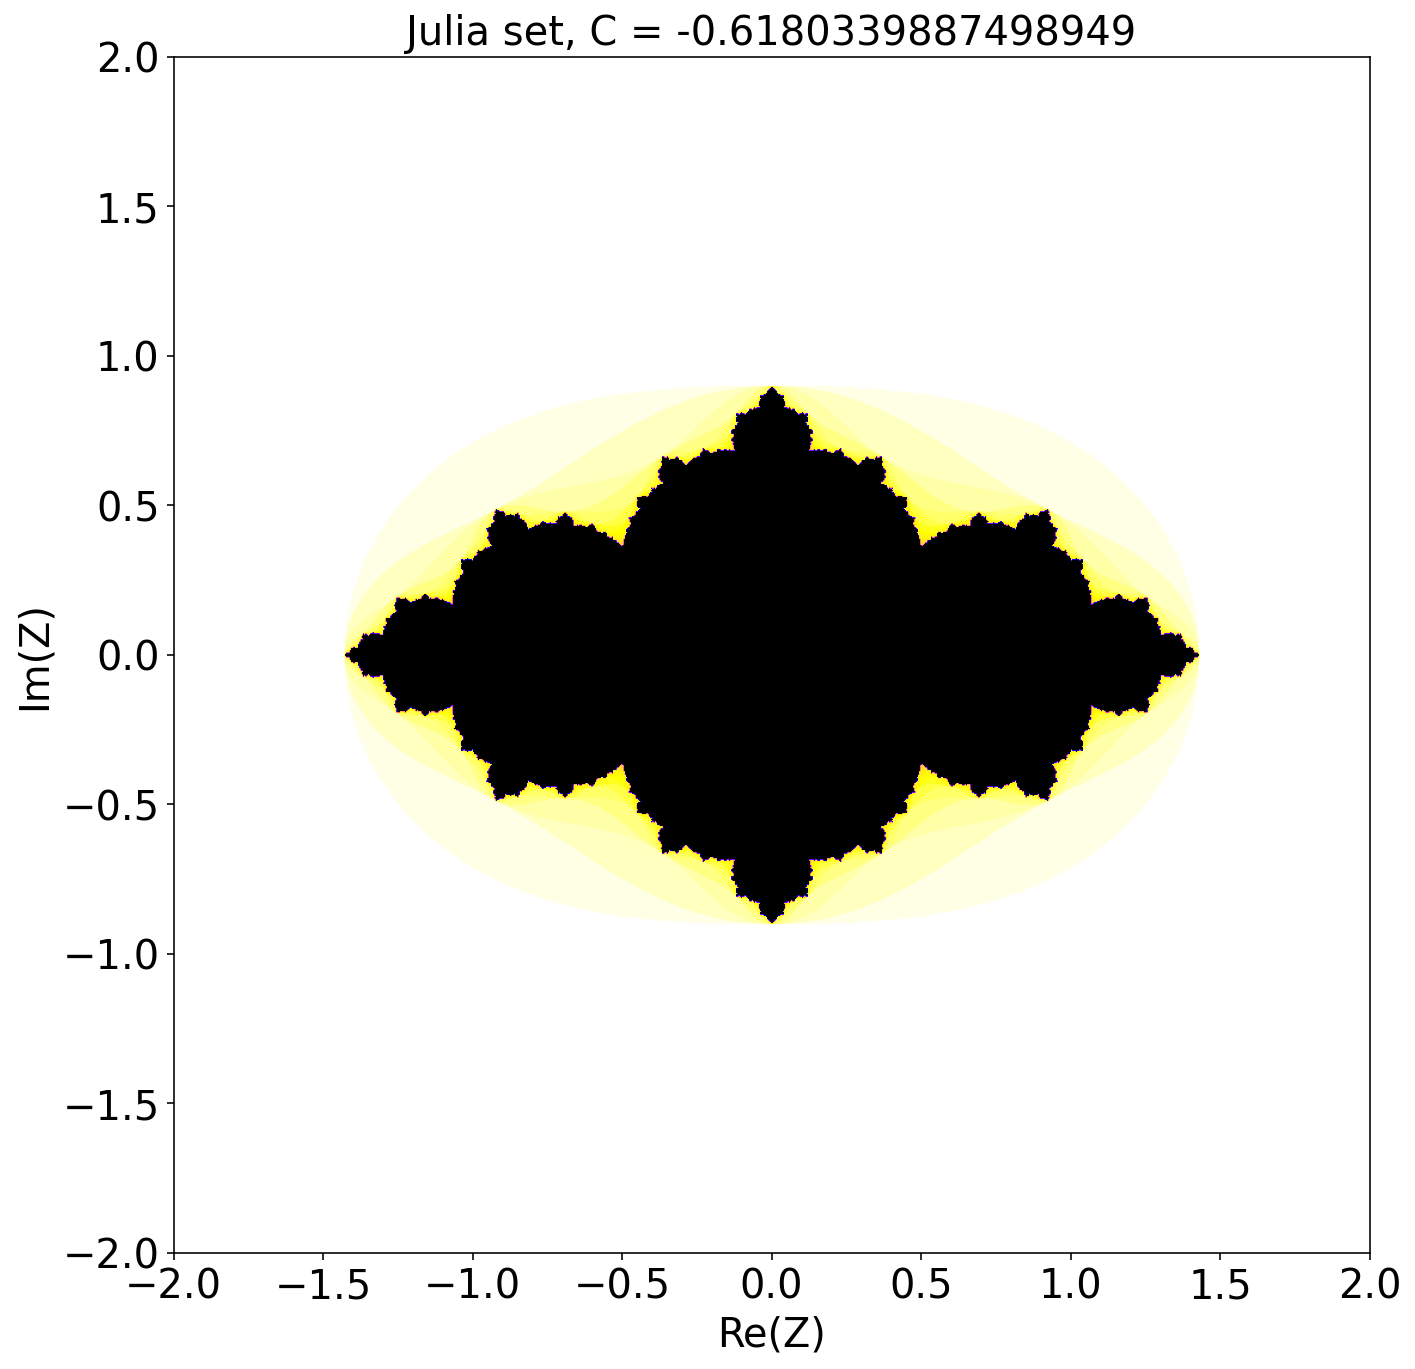

In [5]:
plot_julia(julia_mask(density=1000, c=1-(1 + np.sqrt(5)) / 2), c=1-(1 + np.sqrt(5)) / 2)
plt.show()

In [14]:
def julia_gif(r=1, c_density=100, duration=10, name='julia', **kwargs):
    alphas = np.linspace(0, 1, c_density)
    cs = r*np.exp(2*np.pi*1j*alphas)
    images = []
    for i, c in tqdm(enumerate(cs), total=c_density):
        j = julia_mask(c=c, **kwargs)
        fname = f'./imgs/task2/{name}_{i}.png'
        
        plt.figure(figsize=(14,11))
        plt.imshow(j, cmap='gnuplot2', extent=(-2, 2, -2, 2))
        plt.tick_params(axis='both', labelsize=20)
        plt.title(f"Julia set, C = {r} * exp(2 * pi * i * {alphas[i].round(3)})", fontsize=20)
        plt.xlabel('Re(Z)', fontsize=20)
        plt.ylabel('Im(Z)', fontsize=20)
        plt.savefig(fname, bbox_inches='tight')
        plt.close()
        
        images.append(imageio.imread(fname))
        os.remove(fname)
    fname = f'./imgs/task2/{name}.gif'
    imageio.mimsave(fname, images, fps = c_density / duration)

In [15]:
julia_gif(c_density=240, density=500, duration=10, name='julia240_r1')

  0%|          | 0/24 [00:00<?, ?it/s]

![SegmentLocal](imgs/task2/julia240_r1.gif "segment")

In [8]:
julia_gif(r=0.81, c_density=240, density=500, duration=10, name='julia240_r08')

  0%|          | 0/240 [00:00<?, ?it/s]

![SegmentLocal](imgs/task2/julia240_r08.gif "segment")

In [12]:
julia_gif(r=0.75, c_density=600, density=500, duration=20, name='julia600')

  0%|          | 0/600 [00:00<?, ?it/s]

![SegmentLocal](imgs/task2/julia600.gif "segment")